In [217]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests

In [218]:
linkedin_data_original= pd.read_csv('/Users/deepak/Downloads/dump.csv')        


In [219]:
linkedin_data_original

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration
0,0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,NaN,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361
1,1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361
2,2,41.0,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348.0,2008-08-01,760.5000,747.2308
3,3,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350.0,2007-02-01,760.5000,989.9361
4,4,30.0,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,NaN,1.0,951.0,female,RTMZ0-46bTjK4V_MGFDG6i5g0yZmFp5oS0S9liWvpWg.jpg,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,39532,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2009-04-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Partner,191517.0,2006-08-01,1912.0000,941.0968
39533,39533,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2007-05-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Business Banking Manager / Partner 4,191518.0,2003-08-01,1912.0000,941.0968
39534,39534,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2003-08-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne & Bourke and Russell St ...,NaN,Business Banking Manager / Partner 3,191519.0,2000-06-01,1912.0000,941.0968
39535,39535,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2000-06-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Cr

In [220]:
linkedin_data_original.columns

Index(['Unnamed: 0', 'ageEstimate', 'companyFollowerCount', 'companyHasLogo',
       'companyName', 'companyStaffCount', 'companyUrl', 'companyUrn',
       'connectionsCount', 'country', 'endDate', 'followable',
       'followersCount', 'genderEstimate', 'hasPicture', 'isPremium',
       'mbrLocation', 'mbrLocationCode', 'mbrTitle', 'memberUrn',
       'posLocation', 'posLocationCode', 'posTitle', 'positionId', 'startDate',
       'avgMemberPosDuration', 'avgCompanyPosDuration'],
      dtype='object')

In [221]:
linkedin_data_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39537 entries, 0 to 39536
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             39537 non-null  int64  
 1   ageEstimate            39537 non-null  float64
 2   companyFollowerCount   38071 non-null  float64
 3   companyHasLogo         36407 non-null  object 
 4   companyName            39535 non-null  object 
 5   companyStaffCount      38401 non-null  float64
 6   companyUrl             37449 non-null  object 
 7   companyUrn             39537 non-null  object 
 8   connectionsCount       39537 non-null  float64
 9   country                39537 non-null  object 
 10  endDate                30626 non-null  object 
 11  followable             39537 non-null  float64
 12  followersCount         39537 non-null  float64
 13  genderEstimate         35567 non-null  object 
 14  hasPicture             29601 non-null  object 
 15  is

Observations:

There are missing values in the companyFollowerCount etc
will impute missing columns 
mix of categorical and numnerical and string types 

In [306]:
linkedin_data_original.duplicated().sum()


0

In [223]:

# Let's check for missing values in the data
round(linkedin_data_original.isnull().sum() / linkedin_data_original.isnull().count() * 100, 2)


Unnamed: 0                0.00
ageEstimate               0.00
companyFollowerCount      3.71
companyHasLogo            7.92
companyName               0.01
companyStaffCount         2.87
companyUrl                5.28
companyUrn                0.00
connectionsCount          0.00
country                   0.00
endDate                  22.54
followable                0.00
followersCount            0.00
genderEstimate           10.04
hasPicture               25.13
isPremium                 0.00
mbrLocation               0.00
mbrLocationCode           0.37
mbrTitle                  0.00
memberUrn                 0.00
posLocation              28.14
posLocationCode          57.09
posTitle                  0.00
positionId                0.00
startDate                 0.04
avgMemberPosDuration      0.57
avgCompanyPosDuration     2.15
dtype: float64

##### OBSERVATIONS
#### posLocation,posLocationCode we can drop
#### impute,companyStaffCount, companyFollowerCount 
#### companyHasLogo do not drop , replace NA


In [225]:
linkedin_data_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,39537.0,1.976800e+04,1.141349e+04,0.0,9884.0000,19768.0000,29652.00000,39536.0
ageEstimate,39537.0,3.843425e+01,9.626035e+00,20.0,31.0000,38.0000,45.00000,86.0
companyFollowerCount,38071.0,2.141731e+05,6.942288e+05,0.0,1490.0000,14331.0000,126361.00000,7502740.0
companyStaffCount,38401.0,2.045182e+04,6.754847e+04,0.0,97.0000,1270.0000,9808.00000,568533.0
connectionsCount,39537.0,4.245732e+02,1.233174e+02,0.0,371.0000,500.0000,500.00000,500.0
followable,39537.0,9.501985e-01,2.175373e-01,0.0,1.0000,1.0000,1.00000,1.0
followersCount,39537.0,1.203337e+03,2.976006e+03,0.0,353.0000,654.0000,1191.00000,161922.0
isPremium,39537.0,1.303589e-01,3.367021e-01,0.0,0.0000,0.0000,0.00000,1.0
positionId,39537.0,2.987947e+06,9.043136e+06,22.0,173273.0000,245785.0000,300814.00000,38454426.0
avgMemberPosDuration,39312.0,8.751870e+02,6.398122e+02,0.0,502.1250,730.6000,1068.91965,15492.5


In [226]:
linkedin_data_original['startDate'] = pd.to_datetime(linkedin_data_original['startDate'])
linkedin_data_original['endDate'] = pd.to_datetime(linkedin_data_original['endDate'])
linkedin_data_original.describe()

,Unnamed: 0,ageEstimate,companyFollowerCount,companyStaffCount,connectionsCount,followable,followersCount,isPremium,positionId,avgMemberPosDuration,avgCompanyPosDuration
count,39537.000000,39537.000000,3.807100e+04,38401.000000,39537.000000,39537.000000,39537.000000,39537.000000,3.953700e+04,39312.000000,38686.000000
mean,19768.000000,38.434251,2.141731e+05,20451.816177,424.573159,0.950199,1203.336925,0.130359,2.987947e+06,875.186984,888.257529
std,11413.493133,9.626035,6.942288e+05,67548.466022,123.317422,0.217537,2976.006298,0.336702,9.043136e+06,639.812201,331.099677
min,0.000000,20.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000e+01,0.000000,-91.000000
25%,9884.000000,31.000000,1.490000e+03,97.000000,371.000000,1.000000,353.000000,0.000000,1.732730e+05,502.125000,724.861300
50%,19768.000000,38.000000,1.433100e+04,1270.000000,500.000000,1.000000,654.000000,0.000000,2.457850e+05,730.600000,897.069100
75%,29652.000000,45.000000,1.263610e+05,9808.000000,500.000000,1.000000,1191.000000,0.000000,3.008140e+05,1068.919650,1039.168300
max,39536.000000,86.000000,7.502740e+06,568533.000000,500.000000,1.000000,161922.000000,1.000000,3.845443e+07,15492.500000,9497.000000


Observations:
CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
Customer_Age: Average age of customers is 46 years and it has a wide range from 26 to 73 years.
Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
Months_on_book: All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.

#### ANALYSING CATEGORICAL

In [307]:
linkedin_data_original.describe(include=["object"]).T

,count,unique,top,freq
companyHasLogo,36407,11381,5de45a81-c722-428e-aa8e-a90867d0badb-2.png,683
companyName,39535,13755,Telstra,683
companyUrl,37449,12093,http://www.telstra.com,683
companyUrn,39537,13783,urn:li:company:1636,683
country,39537,1,au,39537
genderEstimate,35567,2,male,23834
hasPicture,29601,4860,Pm54TkNdaEo426PHIrLhQiflArsXe-mF9yedQWZN99A.jpg,69
mbrLocation,39537,474,"Sydney, Australia",9023
mbrLocationCode,39389,461,"urn:li:fs_region:(au,4910)",13811
mbrTitle,39537,6710,National Coordinator - Website and Learning Ma...,69


In [228]:
for i in linkedin_data_original.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(linkedin_data_original[i].value_counts())
    print("*" * 50)

Unique values in companyHasLogo are :
5de45a81-c722-428e-aa8e-a90867d0badb-2.png         683
71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png         484
5a92c12e-0a20-482b-95ec-e705a6294730-2.png         433
e8d29e8b-1601-462c-b780-0f8c19f97157-2.png         327
1ab77aaf-11aa-4351-9450-190964621ef5-2.png         253
                                                  ... 
558d5805-3bdd-497d-82d5-ef9cb18d89f3-2.png           1
0wbEN5wwDCPo63UGbi3KggKgrCEGK_X1AQZaYG-pT7s.png      1
HNGLrZUCU-keVJXdLfU3mr5nkaPclgko0G32flAQlAQ.png      1
e3b68061-d611-4efb-a1d3-b35103e496f8-2.png           1
b7ffbcb8-53d9-4285-a411-7ad739a22ecb-2.png           1
Name: companyHasLogo, Length: 11381, dtype: int64
**************************************************
Unique values in companyName are :
Telstra                    683
National Australia Bank    484
Commonwealth Bank          433
IBM                        327
ANZ                        253
                          ... 
True Health Initiative       1
Lang

In [229]:
linkedin_data_original.head()

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration
0,0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,NaT,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361
1,1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361
2,2,41.0,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348.0,2008-08-01,760.5000,747.2308
3,3,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350.0,2007-02-01,760.5000,989.9361
4,4,30.0,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,NaT,1.0,951.0,female,RTMZ0-46bTjK4V_MGFDG6i5g0yZmFp5oS0S9liWvpWg.jpg,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496


#### ANALYSING FRATURES BY GRAPHS
#### connections count,followers : avg count 
#### ciuntry 
##### has picture,is premium - bargrpah
##### mbrLocation- density graph
##### mbr title per person -graph
#### avgMemberPosDuration,avgCompanyPosDuration -graph

# selecting criteria for premium 
#companies, employeees, jobs title 
#active vs non active customers (last date check )
#reasons to get premium
#followers count- more engagement, network increase, visibility increase  
   #followers count (high) - premium - creater mode,monteize 
#companyHasLogo- authenicity,followers less - more likely to change
#company avg - less more- likely to change
#companyStaffCount- same increase visibility in same as company connection 
#hasPicture-engagement,location- high%  of people taken premium 
#end date-- open job or not
##how oftern company changes, with titles / time :check this
#company profile: company picture,followers,url size -- premium 
#number of companies, position- frequent changer
#title- duration  - exceed than avg - more likely to change


### companies analysis

In [231]:
linkedin_data_copy=linkedin_data_original.copy()

In [232]:
linkedin_data_copy.companyName.value_counts()

Telstra                    683
National Australia Bank    484
Commonwealth Bank          433
IBM                        327
ANZ                        253
                          ... 
True Health Initiative       1
Language Your Way            1
Rice Workshop                1
Datacentrix                  1
Intrawest                    1
Name: companyName, Length: 13755, dtype: int64

In [233]:
linkedin_data_copy.companyName.nunique()

13755

##### ~ 13000 COMPANIES

In [234]:
linkedin_data_copy.posTitle.value_counts()

Project Manager                                                                         442
Director                                                                                369
Consultant                                                                              294
Senior Consultant                                                                       230
Business Analyst                                                                        197
                                                                                       ... 
Manager - Innovation & Strategy                                                           1
Manager - eBusiness & Innovation                                                          1
Manager eBusiness                                                                         1
General Manager - eBusiness                                                               1
Various customer service roles including international services / securities off

In [235]:
# buckets , bar graph 
linkedin_data_copy.avgMemberPosDuration.value_counts()


53.3176      69
639.0000     65
1065.0000    65
609.0000     55
700.0000     51
             ..
2945.0000     1
3920.4000     1
1794.6667     1
1317.1429     1
3073.0000     1
Name: avgMemberPosDuration, Length: 4898, dtype: int64

<AxesSubplot:ylabel='Frequency'>

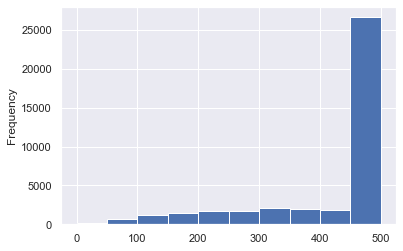

In [236]:
linkedin_data_copy.connectionsCount.value_counts()

linkedin_data_copy.connectionsCount.plot.hist()




/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



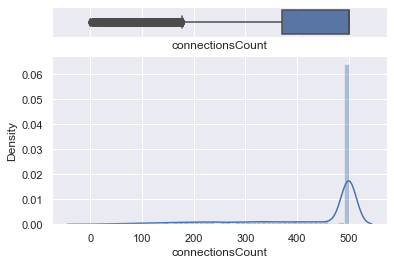

In [237]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(linkedin_data_copy["connectionsCount"], ax=ax_box)
sns.distplot(linkedin_data_copy["connectionsCount"], ax=ax_hist)
ax_box.set(xlabel='connectionsCount')
plt.show()



#### 500 connectoins is considered on higher side, MOST PEOPLE HAVE THAT

<AxesSubplot:ylabel='Frequency'>

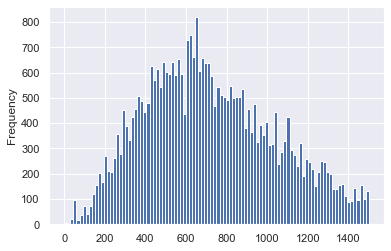

In [238]:
linkedin_data_copy[(linkedin_data_copy['avgMemberPosDuration']<1500)].avgMemberPosDuration.plot.hist(bins=100)


<AxesSubplot:ylabel='Frequency'>

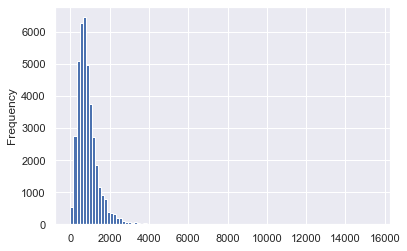

In [239]:
linkedin_data_copy.avgMemberPosDuration.plot.hist(bins=100)
# peak around 1500-2000 days , then it is right skewed 

In [240]:
linkedin_data_copy.avgMemberPosDuration.describe()

count    39312.000000
mean       875.186984
std        639.812201
min          0.000000
25%        502.125000
50%        730.600000
75%       1068.919650
max      15492.500000
Name: avgMemberPosDuration, dtype: float64

##### OBSERVATIONS
#### avgMemberPosDuration : mean is around 870 and median 730- most of the candidates around 2 years
#### after 800~ 3.5 YEARS there is downard trend - more likely cadidates will take premium after 2 years
### it is cyclical trend every year


<AxesSubplot:ylabel='Frequency'>

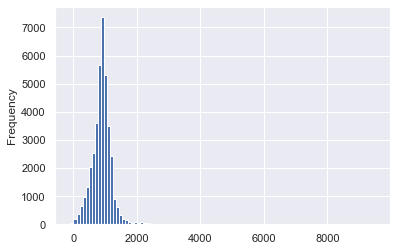

In [242]:
#some big companies will push data towards towards higher number how to balance it 
# dell vs startups 
linkedin_data_copy.avgCompanyPosDuration.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

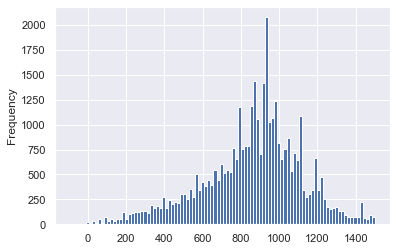

In [243]:
linkedin_data_copy[(linkedin_data_copy['avgCompanyPosDuration']<1500)].avgCompanyPosDuration.plot.hist(bins=100)


<AxesSubplot:ylabel='Frequency'>

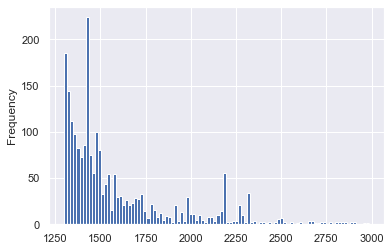

In [244]:
linkedin_data_copy[(linkedin_data_copy['avgCompanyPosDuration']>1300) & (linkedin_data_copy['avgCompanyPosDuration']<3000)].avgCompanyPosDuration.plot.hist(bins=100)




In [245]:
linkedin_data_copy.avgCompanyPosDuration.describe()

count    38686.000000
mean       888.257529
std        331.099677
min        -91.000000
25%        724.861300
50%        897.069100
75%       1039.168300
max       9497.000000
Name: avgCompanyPosDuration, dtype: float64

#### avgCompanyPosDuration : mean is around 900 and median 900 - most of the companies employee stay is around 2.5 years
### after 2.5 years  there is downard trend - more likely cadidates will take premium after 2 years


In [247]:
# linkedin_data_copy['hasPicture'] = linkedin_data_copy['hasPicture'].fillna(0)
# linkedin_data_copy[(linkedin_data_copy['hasPicture']!=0)].hasPicture.replace()
linkedin_data_copy['hasPicture1']=linkedin_data_copy['hasPicture'].copy()
linkedin_data_copy['hasPicture1']=2
linkedin_data_copy

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration,hasPicture1
0,0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,NaT,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361,2
1,1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361,2
2,2,41.0,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348.0,2008-08-01,760.5000,747.2308,2
3,3,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350.0,2007-02-01,760.5000,989.9361,2
4,4,30.0,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,NaT,1.0,951.0,female,RTMZ0-46bTjK4V_MGFDG6i5g0yZmFp5oS0S9liWvpWg.jpg,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,39532,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2009-04-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Partner,191517.0,2006-08-01,1912.0000,941.0968,2
39533,39533,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2007-05-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Business Banking Manager / Partner 4,191518.0,2003-08-01,1912.0000,941.0968,2
39534,39534,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2003-08-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne & Bourke and Russell St ...,NaN,Business Banking Manager / Partner 3,191519.0,2000-06-01,1912.0000,941.0968,2
39535,39535,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2000-06-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,

In [248]:

#linkedin_data_copy[(linkedin_data_copy['hasPicture']!=0)].loc[hasPicture=1
                                                              

In [249]:
#linkedin_data_copy=linkedin_data_copy["hasPicture"].fillna(0, inplace=True)
linkedin_data_copy['duration']=linkedin_data_copy.endDate-linkedin_data_copy.startDate
linkedin_data_copy['duration']=linkedin_data_copy['duration'].dt.days

<AxesSubplot:ylabel='Frequency'>

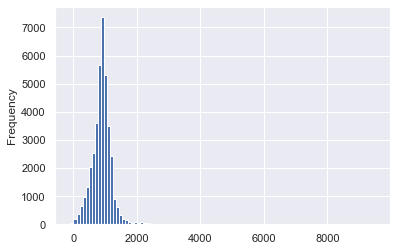

In [250]:
linkedin_data_copy.avgCompanyPosDuration.plot.hist(bins=100)
#linkedin_data_copy[(linkedin_data_copy['avgCompanyPosDuration']>1300)

<AxesSubplot:ylabel='Frequency'>

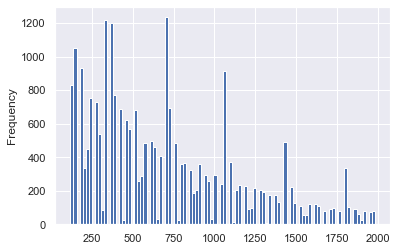

In [251]:
#linkedin_data_copy.value_counts('duration').plot.hist(bins=100)
linkedin_data_copy[(linkedin_data_copy['duration']>100) & (linkedin_data_copy['duration']<2000)].duration.plot.hist(bins=100)



#### most of the candidates leave around 2 years , then there is decline trend 
#### duration has some cyclicity to it , after a year or so 
#### candidates leave around their anniversary or so, 

#### try to make segments for marketing team ,with other features

In [253]:
linkedin_data_copy.duration.value_counts()

365.0     864
92.0      694
1065.0    631
334.0     630
700.0     604
         ... 
6089.0      1
6391.0      1
3925.0      1
4901.0      1
3714.0      1
Name: duration, Length: 747, dtype: int64

In [254]:
#number of companies and number of title 
linkedin_user=linkedin_data_copy.groupby('memberUrn').agg({'companyName':['nunique'],'posTitle':['count']})

#transitdataseller.groupby('seller_state').agg({'freight_value':['mean'],'transit':['mean']})
linkedin_data_copy.shape

(39537, 29)

In [255]:
linkedin_user
transcations = pd.merge(linkedin_user, linkedin_data_copy, on='memberUrn')

/var/folders/36/qftc13yd5z75xgyssqd0ngdw0000gn/T/ipykernel_69471/3533261355.py:2: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)



In [256]:
transcations

,memberUrn,"(companyName, nunique)","(posTitle, count)",Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration,hasPicture1,duration
0,urn:li:member:10013136,2,4,0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,NaT,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361,2,NaN
1,urn:li:member:10013136,2,4,1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361,2,212.0
2,urn:li:member:10013136,2,4,2,41.0,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,NaN,NaN,Project Manager,240348.0,2008-08-01,760.5000,747.2308,2,1583.0
3,urn:li:member:10013136,2,4,3,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,NaN,NaN,Project Manager,240350.0,2007-02-01,760.5000,989.9361,2,516.0
4,urn:li:member:100186032,4,8,4,30.0,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,NaT,1.0,951.0,female,RTMZ0-46bTjK4V_MGFDG6i5g0yZmFp5oS0S9liWvpWg.jpg,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",NaN,NaN,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,urn:li:member:9985941,1,7,39532,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2009-04-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Partner,191517.0,2006-08-01,1912.0000,941.0968,2,974.0
39533,urn:li:member:9985941,1,7,39533,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2007-05-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Business Banking Manager / Partner 4,191518.0,2003-08-01,1912.0000,941.0968,2,1369.0
39534,urn:li:member:9985941,1,7,39534,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2003-08-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",St Kilda Rd Melbourne & Bourke and Russell St ...,NaN,Business Banking Manager / Partner 3,191519.0,2000-06-01,1912.0000,941.0968,2,1156.0
39535,urn:li:member:9985941,1,7,39535,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia B

In [257]:
linkedin_data_copy['hasPicture']

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4        RTMZ0-46bTjK4V_MGFDG6i5g0yZmFp5oS0S9liWvpWg.jpg
                              ...                       
39532                        p_4_000_171_2aa_07c7660.jpg
39533                        p_4_000_171_2aa_07c7660.jpg
39534                        p_4_000_171_2aa_07c7660.jpg
39535                        p_4_000_171_2aa_07c7660.jpg
39536                        p_4_000_171_2aa_07c7660.jpg
Name: hasPicture, Length: 39537, dtype: object

In [258]:
linkedin_data_copy.head()

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration,hasPicture1,duration
0,0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,NaT,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361,2,NaN
1,1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361,2,212.0
2,2,41.0,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348.0,2008-08-01,760.5000,747.2308,2,1583.0
3,3,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350.0,2007-02-01,760.5000,989.9361,2,516.0
4,4,30.0,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,NaT,1.0,951.0,female,RTMZ0-46bTjK4V_MGFDG6i5g0yZmFp5oS0S9liWvpWg.jpg,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496,2,NaN


In [259]:
linkedin_data_copy

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration,hasPicture1,duration
0,0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,NaT,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361,2,NaN
1,1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361,2,212.0
2,2,41.0,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348.0,2008-08-01,760.5000,747.2308,2,1583.0
3,3,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350.0,2007-02-01,760.5000,989.9361,2,516.0
4,4,30.0,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,NaT,1.0,951.0,female,RTMZ0-46bTjK4V_MGFDG6i5g0yZmFp5oS0S9liWvpWg.jpg,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,39532,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2009-04-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Partner,191517.0,2006-08-01,1912.0000,941.0968,2,974.0
39533,39533,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2007-05-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Business Banking Manager / Partner 4,191518.0,2003-08-01,1912.0000,941.0968,2,1369.0
39534,39534,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2003-08-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne & Bourke and Russell St ...,NaN,Business Banking Manager / Partner 3,191519.0,2000-06-01,1912.0000,941.0968,2,1156.0
39535,39535,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2000-06-01,1.0,363.0,male,p_4_000_171_2aa_07c766

In [260]:
linkedin_data_copy["hasPicture"].fillna(0, inplace=True)

linkedin_data_copy.loc[(linkedin_data_copy.hasPicture!=0),'hasPicture']='1'
#reviews.loc[(reviews.country == 'Italy') | (reviews.points >= 90)]
#reviews.loc[0, 'country']


In [261]:
linkedin_data_copy.hasPicture.value_counts()/linkedin_data_copy.shape[0]*100


1    74.86911
0    25.13089
Name: hasPicture, dtype: float64

### 75%-- has picture 25 %-- do not have picture

In [264]:
#linkedin_data_copy['end_datec']=linkedin_data_copy.endDate.copy()

In [265]:
linkedin_data_copy

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration,hasPicture1,duration
0,0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,NaT,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361,2,NaN
1,1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361,2,212.0
2,2,41.0,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348.0,2008-08-01,760.5000,747.2308,2,1583.0
3,3,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350.0,2007-02-01,760.5000,989.9361,2,516.0
4,4,30.0,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,NaT,1.0,951.0,female,1,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,39532,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2009-04-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Partner,191517.0,2006-08-01,1912.0000,941.0968,2,974.0
39533,39533,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2007-05-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Business Banking Manager / Partner 4,191518.0,2003-08-01,1912.0000,941.0968,2,1369.0
39534,39534,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2003-08-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne & Bourke and Russell St ...,NaN,Business Banking Manager / Partner 3,191519.0,2000-06-01,1912.0000,941.0968,2,1156.0
39535,39535,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2000-06-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,Melbourne Office 

In [266]:
linkedin_data_copy["companyHasLogo"].fillna(0,inplace=True)

In [267]:

linkedin_data_copy.loc[(linkedin_data_copy.companyHasLogo!=0),'companyHasLogo']='1'

In [268]:
linkedin_data_copy

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration,hasPicture1,duration
0,0,41.0,198859.0,1,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,NaT,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361,2,NaN
1,1,41.0,198859.0,1,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361,2,212.0
2,2,41.0,10047.0,1,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348.0,2008-08-01,760.5000,747.2308,2,1583.0
3,3,41.0,198859.0,1,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350.0,2007-02-01,760.5000,989.9361,2,516.0
4,4,30.0,300723.0,1,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,NaT,1.0,951.0,female,1,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,39532,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2009-04-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Partner,191517.0,2006-08-01,1912.0000,941.0968,2,974.0
39533,39533,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2007-05-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Business Banking Manager / Partner 4,191518.0,2003-08-01,1912.0000,941.0968,2,1369.0
39534,39534,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2003-08-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne & Bourke and Russell St ...,NaN,Business Banking Manager / Partner 3,191519.0,2000-06-01,1912.0000,941.0968,2,1156.0
39535,39535,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2000-06-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,Melbourne Office Business Banking Centre,NaN,Business Banking Officer,191520.0,1995-11-01,1912.0000,941.0968,2,1674.0


In [269]:
linkedin_data_copy.companyHasLogo.value_counts()/linkedin_data_copy.shape[0]*100
# most of the company has logo

1    92.083365
0     7.916635
Name: companyHasLogo, dtype: float64

In [270]:
#linkedin_data_copy["companyHasLogo"].fillna(0,inplace=True)
linkedin_data_copy.replace({pd.NaT: "0 days"}, inplace=True)

In [271]:
#find latest start date and check end date for each person to check job open or not

In [293]:
linkedin_user=linkedin_data_copy.groupby('memberUrn').agg({'companyName':['nunique'],'posTitle':['count']}).reset_index()

#transitdataseller.groupby('seller_state').agg({'freight_value':['mean'],'transit':['mean']})
# linkedin_data_copy.shape
#linkedin_user
 #transcations = pd.merge(linkedin_user, linkedin_data_copy, on='memberUrn')

In [294]:
linkedin_user.rename

,memberUrn,companyName,posTitle
,,nunique,count
0,urn:li:member:10013136,2,4
1,urn:li:member:100186032,4,8
2,urn:li:member:100189195,6,7
3,urn:li:member:100207000,4,6
4,urn:li:member:100271877,15,15
...,...,...,...
6848,urn:li:member:996695,12,19
6849,urn:li:member:99727786,9,11
6850,urn:li:member:9976147,14,17


In [273]:
# linkedin_user
transcations = pd.merge(linkedin_user, linkedin_data_copy, on='memberUrn')

/var/folders/36/qftc13yd5z75xgyssqd0ngdw0000gn/T/ipykernel_69471/2172314950.py:2: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)



In [309]:
transcations

,memberUrn,"(companyName, nunique)","(posTitle, count)",Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration,hasPicture1,duration
0,urn:li:member:10013136,2,4,0,41.0,198859.0,1,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,0 days,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,0 days,0 days,Portfolio Executive,240345.0,2014-07-01 00:00:00,760.5000,989.9361,2,NaN
1,urn:li:member:10013136,2,4,1,41.0,198859.0,1,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01 00:00:00,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01 00:00:00,760.5000,989.9361,2,212.0
2,urn:li:member:10013136,2,4,2,41.0,10047.0,1,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01 00:00:00,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,0 days,0 days,Project Manager,240348.0,2008-08-01 00:00:00,760.5000,747.2308,2,1583.0
3,urn:li:member:10013136,2,4,3,41.0,198859.0,1,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01 00:00:00,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,0 days,0 days,Project Manager,240350.0,2007-02-01 00:00:00,760.5000,989.9361,2,516.0
4,urn:li:member:100186032,4,8,4,30.0,300723.0,1,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,0 days,1.0,951.0,female,1,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",0 days,0 days,Senior Marketing Manager,229893.0,2017-01-01 00:00:00,395.2857,683.3496,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,urn:li:member:9985941,1,7,39532,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2009-04-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",St Kilda Rd Melbourne Business Banking Centre,0 days,Senior Partner,191517.0,2006-08-01 00:00:00,1912.0000,941.0968,2,974.0
39533,urn:li:member:9985941,1,7,39533,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2007-05-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",St Kilda Rd Melbourne Business Banking Centre,0 days,Senior Business Banking Manager / Partner 4,191518.0,2003-08-01 00:00:00,1912.0000,941.0968,2,1369.0
39534,urn:li:member:9985941,1,7,39534,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2003-08-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",St Kilda Rd Melbourne & Bourke and Russell St ...,0 days,Business Banking Manager / Partner 3,191519.0,2000-06-01 00:00:00,1912.0000,941.0968,2,1156.0
39535,urn:li:member:9985941,1,7,39535,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2000-06-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",Melbourne Office Business Banking Centre,0 days,Business Banking Officer,191520.0,1995-11-01 00:00:00,1912.0000,941.0968,2,

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



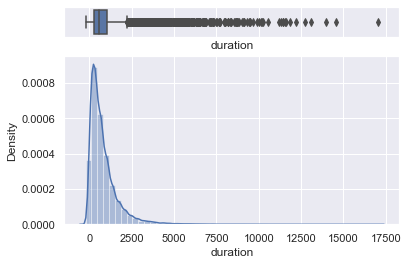

In [275]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(transcations["duration"], ax=ax_box)
sns.distplot(transcations["duration"], ax=ax_hist)
ax_box.set(xlabel='duration')
plt.show()

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



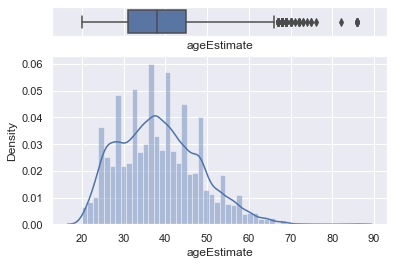

In [276]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(transcations["ageEstimate"], ax=ax_box)
sns.distplot(transcations["ageEstimate"], ax=ax_hist)
ax_box.set(xlabel='ageEstimate')
plt.show()

In [304]:
transcations.companyHasLogo.value_counts()/transcations.shape[0]*100
# most of the company has logo 


1    92.083365
0     7.916635
Name: companyHasLogo, dtype: float64

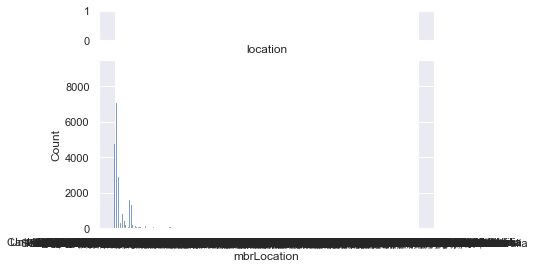

In [277]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.histplot(transcations["mbrLocation"], ax=ax_hist)
ax_box.set(xlabel='location')
plt.show()

<AxesSubplot:>

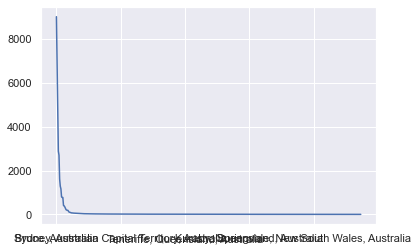

In [278]:
transcations.mbrLocation.value_counts().plot()

In [280]:
transcations

,memberUrn,"(companyName, nunique)","(posTitle, count)",Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration,hasPicture1,duration
0,urn:li:member:10013136,2,4,0,41.0,198859.0,1,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,0 days,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,0 days,0 days,Portfolio Executive,240345.0,2014-07-01 00:00:00,760.5000,989.9361,2,NaN
1,urn:li:member:10013136,2,4,1,41.0,198859.0,1,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01 00:00:00,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01 00:00:00,760.5000,989.9361,2,212.0
2,urn:li:member:10013136,2,4,2,41.0,10047.0,1,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01 00:00:00,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,0 days,0 days,Project Manager,240348.0,2008-08-01 00:00:00,760.5000,747.2308,2,1583.0
3,urn:li:member:10013136,2,4,3,41.0,198859.0,1,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01 00:00:00,1.0,506.0,male,0,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,0 days,0 days,Project Manager,240350.0,2007-02-01 00:00:00,760.5000,989.9361,2,516.0
4,urn:li:member:100186032,4,8,4,30.0,300723.0,1,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,0 days,1.0,951.0,female,1,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",0 days,0 days,Senior Marketing Manager,229893.0,2017-01-01 00:00:00,395.2857,683.3496,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,urn:li:member:9985941,1,7,39532,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2009-04-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",St Kilda Rd Melbourne Business Banking Centre,0 days,Senior Partner,191517.0,2006-08-01 00:00:00,1912.0000,941.0968,2,974.0
39533,urn:li:member:9985941,1,7,39533,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2007-05-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",St Kilda Rd Melbourne Business Banking Centre,0 days,Senior Business Banking Manager / Partner 4,191518.0,2003-08-01 00:00:00,1912.0000,941.0968,2,1369.0
39534,urn:li:member:9985941,1,7,39534,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2003-08-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",St Kilda Rd Melbourne & Bourke and Russell St ...,0 days,Business Banking Manager / Partner 3,191519.0,2000-06-01 00:00:00,1912.0000,941.0968,2,1156.0
39535,urn:li:member:9985941,1,7,39535,46.0,151686.0,1,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2000-06-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",Melbourne Office Business Banking Centre,0 days,Business Banking Officer,191520.0,1995-11-01 00:00:00,1912.0000,941.0968,2,

In [281]:
transcationscopy=transcations.copy()

In [297]:
transcationscopy=transcationscopy.drop(['Unnamed: 0','companyName','companyUrl','companyUrn','country','mbrLocationCode','posLocation',
                      'posTitle','posLocationCode','positionId','hasPicture1'], axis=1)

In [310]:
transcationscopy

,memberUrn,"(companyName, nunique)","(posTitle, count)",ageEstimate,companyFollowerCount,companyHasLogo,companyStaffCount,connectionsCount,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,startDate,avgMemberPosDuration,avgCompanyPosDuration,duration
0,urn:li:member:10013136,2,4,41.0,198859.0,1,32905.0,500.0,0 days,1.0,506.0,male,0,0.0,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,2014-07-01 00:00:00,760.5000,989.9361,NaN
1,urn:li:member:10013136,2,4,41.0,198859.0,1,32905.0,500.0,2014-06-01 00:00:00,1.0,506.0,male,0,0.0,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,2013-11-01 00:00:00,760.5000,989.9361,212.0
2,urn:li:member:10013136,2,4,41.0,10047.0,1,619.0,500.0,2012-12-01 00:00:00,1.0,506.0,male,0,0.0,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,2008-08-01 00:00:00,760.5000,747.2308,1583.0
3,urn:li:member:10013136,2,4,41.0,198859.0,1,32905.0,500.0,2008-07-01 00:00:00,1.0,506.0,male,0,0.0,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,2007-02-01 00:00:00,760.5000,989.9361,516.0
4,urn:li:member:100186032,4,8,30.0,300723.0,1,22522.0,500.0,0 days,1.0,951.0,female,1,0.0,"Sydney Area, Australia","Senior Marketing Manager, PayPal",2017-01-01 00:00:00,395.2857,683.3496,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,urn:li:member:9985941,1,7,46.0,151686.0,1,27944.0,362.0,2009-04-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","Head Of (Distributed) Credit, Vic/Tas at Natio...",2006-08-01 00:00:00,1912.0000,941.0968,974.0
39533,urn:li:member:9985941,1,7,46.0,151686.0,1,27944.0,362.0,2007-05-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","Head Of (Distributed) Credit, Vic/Tas at Natio...",2003-08-01 00:00:00,1912.0000,941.0968,1369.0
39534,urn:li:member:9985941,1,7,46.0,151686.0,1,27944.0,362.0,2003-08-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","Head Of (Distributed) Credit, Vic/Tas at Natio...",2000-06-01 00:00:00,1912.0000,941.0968,1156.0
39535,urn:li:member:9985941,1,7,46.0,151686.0,1,27944.0,362.0,2000-06-01 00:00:00,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","Head Of (Distributed) Credit, Vic/Tas at Natio...",1995-11-01 00:00:00,1912.0000,941.0968,1674.0


In [346]:
transcationsgrp=transcationscopy.groupby('memberUrn').agg({
    'ageEstimate': 'mean', 
    'companyFollowerCount': 'first',
    'companyHasLogo':'first',
    'connectionsCount':'mean',
    'endDate': 'first', 
    'followersCount': 'mean',
    'hasPicture':'first',
    'genderEstimate':'first',
    'mbrLocation':'first',
    'avgMemberPosDuration':'mean',
    'avgCompanyPosDuration':'first',
    'isPremium':'first'
    
}).reset_index()

#transitdataseller.groupby('seller_state').agg({'freight_value':['mean'],'transit':['mean']})


In [347]:
transcationsgrp.columns

Index(['memberUrn', 'ageEstimate', 'companyFollowerCount', 'companyHasLogo',
       'connectionsCount', 'endDate', 'followersCount', 'hasPicture',
       'genderEstimate', 'mbrLocation', 'avgMemberPosDuration',
       'avgCompanyPosDuration', 'isPremium'],
      dtype='object')

Text(0, 0.5, 'gender premium %')

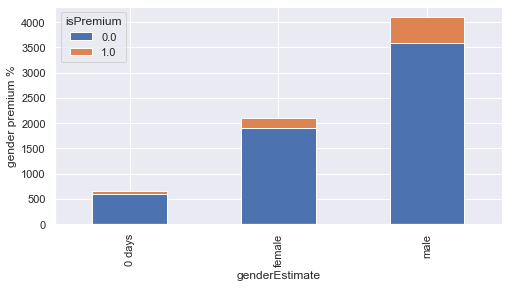

In [350]:
(pd.crosstab(transcationsgrp['genderEstimate'],transcationsgrp['isPremium'])).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('gender premium %')


Text(0, 0.5, ' premium %')

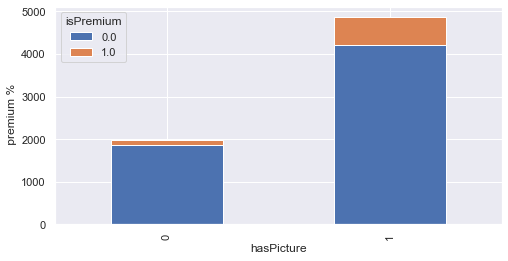

In [351]:
(pd.crosstab(transcationsgrp['hasPicture'],transcationsgrp['isPremium'])).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel(' premium %')


In [353]:
# end date
transcationsgrp.endDate.value_counts()/transcationsgrp.shape[0]*100


0 days                 69.794251
2018-01-01 00:00:00     2.480665
2018-02-01 00:00:00     2.232599
2018-03-01 00:00:00     1.940756
2018-06-01 00:00:00     1.867795
                         ...    
2003-11-01 00:00:00     0.014592
1994-11-01 00:00:00     0.014592
2003-12-01 00:00:00     0.014592
2006-08-01 00:00:00     0.014592
2010-09-01 00:00:00     0.014592
Name: endDate, Length: 172, dtype: float64